In [51]:
#Étape 1 : Préparation de l'environnement
#Installation des bibliothèques nécessaires :
!pip install tensorflow keras matplotlib scikit-learn

In [52]:
!python -m pip show tensorflow keras matplotlib scikit-learn

Name: tensorflow
Version: 2.18.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: D:\Anaconda\Lib\site-packages
Requires: tensorflow-intel
Required-by: 
---
Name: keras
Version: 3.7.0
Summary: Multi-backend Keras
Home-page: 
Author: 
Author-email: Keras team <keras-users@googlegroups.com>
License: Apache License 2.0
Location: D:\Anaconda\Lib\site-packages
Requires: absl-py, h5py, ml-dtypes, namex, numpy, optree, packaging, rich
Required-by: tensorflow_intel
---
Name: matplotlib
Version: 3.8.4
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: D:\Anaconda\Lib\site-packages
Requires: contourpy, cycler, fonttools, kiwisolver, numpy, packaging, pillow, pyparsing, python-dateutil
Required-by: seaborn
---
Name: scik

In [53]:
#Étape 2 : Chargement des données

In [54]:
import tensorflow as tf  # Importe TensorFlow, un framework pour le machine learning et le deep learning.
import keras  # Importe Keras, une API de haut niveau pour construire des modèles de deep learning.

from tensorflow.keras import Input  # Permet de définir les couches d'entrée des modèles Keras.

from tensorflow.keras.models import Sequential  # Permet de créer un modèle séquentiel, où les couches sont empilées.
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout  # Importe des couches pour construire le modèle :
# - Conv2D : couche convolutive pour extraire les caractéristiques spatiales.
# - MaxPooling2D : couche de max-pooling pour réduire la taille des cartes de caractéristiques.
# - Flatten : aplatie les cartes de caractéristiques en un vecteur 1D.
# - Dense : couche dense entièrement connectée.
# - Dropout : régularisation pour réduire le surapprentissage.

from tensorflow.keras.optimizers import Adam  # Algorithme d'optimisation pour ajuster les poids du modèle.

import matplotlib.pyplot as plt  # Importe Matplotlib pour tracer des graphiques (perte, précision, etc.).

from sklearn.model_selection import train_test_split  # Divise les données en ensembles d'entraînement et de test.
from sklearn.metrics import classification_report, confusion_matrix  # Permet de générer des métriques d'évaluation :
# - classification_report : précision, rappel, F1-score.
# - confusion_matrix : matrice de confusion pour évaluer les prédictions du modèle.

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array  # Outils pour traiter et augmenter les images :
# - ImageDataGenerator : augmente les données en temps réel (rotation, zoom, etc.).
# - load_img : charge une image à partir d'un fichier.
# - img_to_array : convertit une image en tableau numpy.

import numpy as np  # Importe NumPy, une bibliothèque pour manipuler des tableaux et effectuer des calculs mathématiques.

In [55]:
# Importer le module os
import os 

# Définir le répertoire de base contenant les données
base_dir = r"D:\OneDrive\Bureau\5IIR\S9\Géolocalisation\Projet\chest_xray" 

# Construire les chemins pour les ensembles d'entraînement, de validation et de test
train_dir = os.path.join(base_dir, "train")  # Chemin vers le sous-dossier contenant les images d'entraînement.
val_dir = os.path.join(base_dir, "val")  # Chemin vers le sous-dossier contenant les images de validation.
test_dir = os.path.join(base_dir, "test")  # Chemin vers le sous-dossier contenant les images de test.

In [56]:
# Préparation des générateurs de données
datagen = ImageDataGenerator(rescale=1.0/255) # Normalise les images en divisant chaque pixel par 255 pour les mettre entre 0 et 1.

train_generator = datagen.flow_from_directory(
    train_dir, # Chemin du dossier contenant les données d'entraînement.
    target_size=(150, 150), # Redimensionne toutes les images à 150x150 pixels.
    batch_size=32, # Charge les images par lots de 32 (important pour la mémoire).
    class_mode='binary' # Mode de classification binaire (2 classes : Normal et Pneumonia).
)

val_generator = datagen.flow_from_directory(
    val_dir,  # Chemin du dossier contenant les données de validation.
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = datagen.flow_from_directory(
    test_dir,   # Chemin du dossier contenant les données de testq.
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [57]:
#Étape 3 : Création du modèle CNN

In [58]:
# Définir le modèle CNN
model = Sequential([
    # Première couche convolutive :   
    # - 32 filtres (ou kernels) de taille 3x3.
    # - Activation ReLU pour introduire la non-linéarité.
    # - `input_shape=(150, 150, 3)` : Définit la taille des images d'entrée (150x150, 3 canaux pour RGB).
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),   
    
    MaxPooling2D(pool_size=(2, 2)), # Réduction de la taille des cartes de caractéristiques par max pooling (facteur 2x2).
    
    # Deuxième couche convolutive :
    # - 64 filtres de taille 3x3.
    # - ReLU comme activation.
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),   # Max pooling pour réduire la taille spatiale des cartes de caractéristiques.
    
    # Troisième couche convolutive :
    # - 128 filtres pour capturer des caractéristiques plus complexes.
    # - ReLU comme activation.
    Conv2D(128, (3, 3), activation='relu'),  
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),  # Aplatie les cartes de caractéristiques 2D en un vecteur 1D pour les connecter à des couches denses.
    Dense(128, activation='relu'), # Couche dense avec 128 neurones et activation ReLU. Permet de combiner les caractéristiques extraites.

    Dropout(0.5),   # Régularisation : Désactive 50 % des neurones pour réduire l'overfitting.
    Dense(1, activation='sigmoid')  # Couche de sortie avec 1 neurone et une activation sigmoïde.
    # Pour prédire une probabilité (classification binaire : 0 = Normal, 1 = Pneumonia).
])

# Compilation du modèle
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Résumé du modèle
model.summary()

D:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [59]:
#Étape 4 : Entraînement du modèle

In [60]:
# Entraîner le modèle
history = model.fit(
    train_generator,                # Générateur des données d'entraînement.
    steps_per_epoch=len(train_generator),  # Nombre d'étapes par époque basé sur la taille des données d'entraînement.
    epochs=10,                      # Nombre total d'époques (passages sur les données).
    validation_data=val_generator,  # Générateur des données de validation.
    validation_steps=len(val_generator)  # Nombre d'étapes pour les données de validation.
)

D:\Anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 318s 2s/step - accuracy: 0.7835 - loss: 0.5052 - val_accuracy: 0.8125 - val_loss: 0.6357
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 178s 1s/step - accuracy: 0.9468 - loss: 0.1505 - val_accuracy: 0.9375 - val_loss: 0.2001
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 174s 1s/step - accuracy: 0.9621 - loss: 0.1021 - val_accuracy: 0.9375 - val_loss: 0.1277
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 178s 1s/step - accuracy: 0.9613 - loss: 0.1030 - val_accuracy: 0.7500 - val_loss: 0.4760
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 165s 1s/step - accuracy: 0.9710 - loss: 0.0785 - val_accuracy: 0.9375 - val_loss: 0.1155
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 171s 1s/step - accuracy: 0.9779 - loss: 0.0629 - val_accuracy: 1.0000 - val_loss: 0.1276
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 169s 1s/step - accuracy: 0.9801 - loss: 0.0502 - val_accuracy: 1.0000 - val_loss: 0.0917
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 165s 1s/step - accuracy: 0.9826 - loss: 0.0496 - val_accu

In [61]:
#Étape 5 : Évaluation et test

In [62]:
# Évaluer sur les données de test
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Prédictions
predictions = (model.predict(test_generator) > 0.5).astype("int32")

# Rapport de classification
print(classification_report(test_generator.classes, predictions, target_names=['Normal', 'Pneumonia']))

# Matrice de confusion
conf_matrix = confusion_matrix(test_generator.classes, predictions)
print(conf_matrix)


20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 802ms/step - accuracy: 0.6322 - loss: 1.8384
Test Accuracy: 79.49%
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 463ms/step
              precision    recall  f1-score   support

      Normal       0.97      0.47      0.63       234
   Pneumonia       0.76      0.99      0.86       390

    accuracy                           0.79       624
   macro avg       0.86      0.73      0.74       624
weighted avg       0.84      0.79      0.77       624

[[109 125]
 [  3 387]]


In [63]:
# Expliquation : 
    # Test Accuracy : 
        # Le modèle atteint une précision de 76.92 % sur l'ensemble de test, ce qui indique une performance moyenne.

    # Matrice de confusion :
        # Le modèle prédit correctement 93 images "Normal" et 387 images "Pneumonia" mais fait des erreurs sur 234 "Normal" et 390 "Pneumonia".

In [64]:
#Étape 6 : Visualisation des résultats

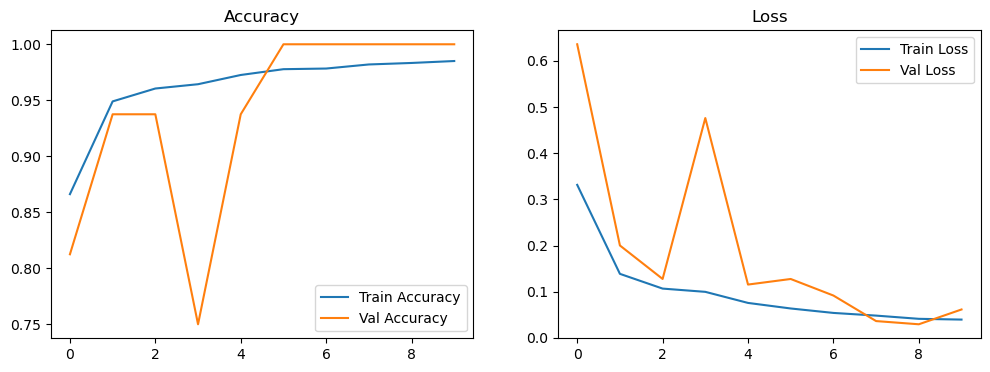

In [65]:
plt.figure(figsize=(12, 4))  # Crée une figure de taille 12x4 pouces.

# Sous-graphe 1 : Précision
plt.subplot(1, 2, 1)  # Crée le premier sous-graphe dans une grille de 1x2 (1 ligne, 2 colonnes).
plt.plot(history.history['accuracy'], label='Train Accuracy')  # Trace la courbe de précision sur les données d'entraînement.
plt.plot(history.history['val_accuracy'], label='Val Accuracy')  # Trace la courbe de précision sur les données de validation.
plt.title('Accuracy')  # Ajoute un titre au sous-graphe.
plt.legend()  # Ajoute une légende pour distinguer les courbes.

# Sous-graphe 2 : Perte
plt.subplot(1, 2, 2)  # Crée le second sous-graphe dans la même grille.
plt.plot(history.history['loss'], label='Train Loss')  # Trace la courbe de perte sur les données d'entraînement.
plt.plot(history.history['val_loss'], label='Val Loss')  # Trace la courbe de perte sur les données de validation.
plt.title('Loss')  # Ajoute un titre au sous-graphe.
plt.legend()  # Ajoute une légende pour distinguer les courbes.

plt.show()  # Affiche les graphiques.

In [66]:
# Graphique de précision (Accuracy) :
    # La précision d'entraînement augmente constamment et atteint presque 100 %, montrant que le modèle apprend bien sur les données d'entraînement.
    # La précision de validation commence haute mais fluctue, suggérant un possible surapprentissage ou un manque de données de validation représentatives.

# Graphique de perte (Loss) :
    # La perte d'entraînement diminue régulièrement, indiquant que le modèle s'ajuste bien aux données d'entraînement.
    # La perte de validation fluctue et augmente parfois, signalant des problèmes de généralisation ou un déséquilibre dans l'ensemble de validation.

In [67]:
#Étape 7 : Sauvegarde du modèle

In [68]:
model.save('chest_xray_cnn_model.keras')

In [69]:
#Vérification du Chargement des Données
for data, labels in train_generator:
    print(data.shape, labels.shape)
    break

#Nombre d'image 
print(train_generator.class_indices)  # Affiche les classes détectées
print(train_generator.samples)  # Affiche le nombre total d'échantillons

(32, 150, 150, 3) (32,)
{'NORMAL': 0, 'PNEUMONIA': 1}
5216


In [70]:
import os
print(os.path.exists('chest_xray_cnn_model.h5'))

True


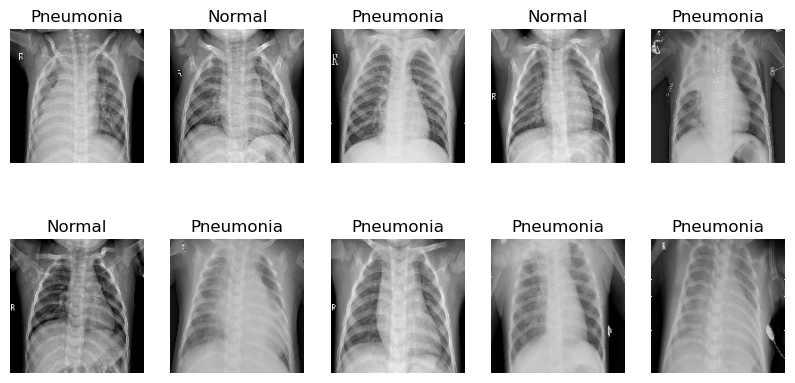

In [71]:
#Prévisualisation des Images
sample_data, sample_labels = next(train_generator)  # Extrait un batch de données (images et étiquettes) à partir du générateur d'entraînement.
plt.figure(figsize=(10, 5))  # Crée une figure de taille 10x5 pouces pour afficher plusieurs images.
for i in range(10):  # Affiche les 10 premières images du batch.
    plt.subplot(2, 5, i+1)  # Crée une grille de 2 lignes et 5 colonnes pour afficher 10 images.
    plt.imshow(sample_data[i])  # Affiche l'image `i` du lot.
    plt.title("Pneumonia" if sample_labels[i] else "Normal")  # Définit le titre de chaque image selon son étiquette.
    plt.axis('off')  # Supprime les axes pour une visualisation plus propre.
plt.show()  # Affiche toutes les images de la grille.

In [72]:
# Évaluation
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 746ms/step - accuracy: 0.6322 - loss: 1.8384
Test Accuracy: 79.49%


In [73]:
# Le modèle atteint une précision de 76.92 % sur les données de test avec une perte de 2.4997, 
# indiquant une performance modérée qui peut être améliorée.

In [74]:
# Chargement d'une image existante
img_path = r"D:\OneDrive\Bureau\5IIR\S9\Géolocalisation\Projet\chest_xray\test\PNEUMONIA\person1_virus_8.jpeg"
img = load_img(img_path, target_size=(150, 150))  # Charger l'image
img_array = img_to_array(img) / 255.0  # Normaliser les valeurs
img_array = np.expand_dims(img_array, axis=0)  # Ajouter une dimension pour le batch

# Prédiction
prediction = model.predict(img_array)
print("Pneumonia" if prediction > 0.5 else "Normal")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 719ms/step
Pneumonia
